In [10]:
import pandas as pd
import matplotlib.pyplot as plt

gfe=pd.read_csv("gfe.csv")
gfe=gfe.set_index(pd.to_datetime(gfe["Tarih"]))
del gfe["Tarih"]

gfe_aylık=gfe.resample('M').mean()
gfe

C:\Users\Bora\AppData\Local\Temp\ipykernel_14156\4290076473.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  gfe_aylık=gfe.resample('M').mean()


,GFE
Tarih,
2024-10-11,100.000000
2024-10-12,100.270259
2024-10-13,100.168941
2024-10-14,100.720353
2024-10-15,100.914669
2024-10-16,101.173334
2024-10-17,101.296106
2024-10-18,100.433474
2024-10-19,100.335928


In [11]:
sepet=pd.read_csv("sepet.csv")
sepet=sepet.set_index(sepet["Unnamed: 0"])
del sepet["Unnamed: 0"]
sepet["Değişim"]=((sepet.iloc[:,-1]/sepet.iloc[:,1])-1)*100
sepet

,Ürün,2024-10-11,2024-10-12,2024-10-13,2024-10-14,2024-10-15,2024-10-16,2024-10-17,2024-10-18,2024-10-19,...,2024-10-23,2024-10-24,2024-10-25,2024-10-26,2024-10-27,2024-10-28,2024-10-29,2024-10-30,2024-10-31,Değişim
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Antep Fıstığı,Tadım Antep Fıstığı 180 G,187.95,187.95,187.95,187.95,187.95,187.95,187.95,187.95,187.95,...,187.95,187.95,187.95,187.95,187.95,187.95,187.95,187.95,187.95,0.000000
Antep Fıstığı,Siirt Fıstığı Tuzlu Kavrulmuş Kg,899.95,899.95,899.95,899.95,899.95,899.95,899.95,899.95,899.95,...,899.95,899.95,899.95,899.95,899.95,899.95,899.95,899.95,899.95,0.000000
Antep Fıstığı,Migros Kavrulmuş Antep Fıstığı 150 G,89.50,89.50,89.50,89.50,89.50,89.50,89.50,89.50,89.50,...,89.50,89.50,89.50,89.50,89.50,89.50,89.50,89.50,89.50,0.000000
Antep Fıstığı,Migros Antep Fıstığı Jumbo 200 G,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,...,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,0.000000
Antep Fıstığı,Master Nut Kabuklu Antep Fıstığı 140 G,132.95,132.95,132.95,132.95,132.95,132.95,132.95,132.95,132.95,...,132.95,132.95,132.95,132.95,132.95,132.95,132.95,132.95,132.95,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Şehriye,Filiz Arpa Şehriye 500 G,22.75,22.75,22.75,22.75,22.75,22.75,22.75,22.75,22.75,...,22.75,22.75,22.75,22.75,22.75,22.75,22.75,22.75,22.75,0.000000
Şehriye,Pastavilla İri Arpa Şehriye 500 G,27.95,27.95,27.95,27.95,27.95,27.95,27.95,27.95,27.95,...,27.95,27.95,27.95,27.95,27.95,27.95,27.95,27.95,27.95,0.000000
Şehriye,Carrefour Tel Şehriye 500 g,10.75,10.75,10.75,10.75,10.75,10.75,10.75,11.75,11.75,...,11.75,11.75,11.75,11.75,11.75,11.75,11.75,11.75,11.75,9.302326


In [12]:
endeksler=pd.read_csv("endeksler.csv")
endeksler=endeksler.set_index(endeksler["Ürün"])
del endeksler["Ürün"]
endeksler["Değişim"]=((endeksler.iloc[:,-1]/endeksler.iloc[:,0])-1)*100
endeksler

,Endeks_2024-10-11,Endeks_2024-10-12,Endeks_2024-10-13,Endeks_2024-10-14,Endeks_2024-10-15,Endeks_2024-10-16,Endeks_2024-10-17,Endeks_2024-10-18,Endeks_2024-10-19,Endeks_2024-10-20,...,Endeks_2024-10-23,Endeks_2024-10-24,Endeks_2024-10-25,Endeks_2024-10-26,Endeks_2024-10-27,Endeks_2024-10-28,Endeks_2024-10-29,Endeks_2024-10-30,Endeks_2024-10-31,Değişim
Ürün,,,,,,,,,,,,,,,,,,,,,
Pirinç,100,100.000000,100.000000,104.134813,103.813727,103.813727,103.813727,103.813727,103.357897,103.357897,...,103.357897,103.776953,103.776953,103.776953,103.776953,103.776953,103.776953,103.734033,103.734033,3.734033
Buğday Unu,100,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.505967,100.505967,100.505967,...,100.505967,100.505967,100.505967,100.505967,100.505967,100.505967,100.505967,100.505967,100.505967,0.505967
Bebek Sütü (Toz Karışım),100,100.000000,100.000000,100.000000,100.648213,100.648213,98.948425,98.948425,98.948425,98.948425,...,100.463517,100.648213,100.648213,100.648213,100.648213,100.648213,100.648213,100.631592,100.631592,0.631592
Bulgur,100,100.335517,100.335517,104.122568,104.122568,104.514207,104.514207,104.514207,104.872435,104.435169,...,104.435169,105.698307,105.698307,105.698307,105.698307,105.698307,105.698307,105.698307,105.698307,5.698307
Ekmek,100,100.000000,100.000000,101.265957,101.265957,101.265957,101.265957,101.265957,101.265957,101.265957,...,101.718663,101.718663,102.175406,102.175406,102.175406,102.175406,102.175406,102.175406,102.175406,2.175406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gazoz Meyveli,100,100.000000,100.000000,100.224921,100.224921,100.336764,100.336764,100.224921,100.224921,100.224921,...,101.252194,101.378233,101.457025,101.192031,101.192031,101.192031,101.192031,101.192031,101.192031,1.192031
Kola,100,99.936143,99.936143,99.936143,99.936143,101.564164,101.564164,101.112936,101.112936,101.112936,...,102.751033,102.751033,102.751033,102.751033,102.751033,102.751033,102.751033,102.751033,102.751033,2.751033
Soğuk Çay,100,100.000000,100.000000,100.000000,100.000000,100.332226,100.332226,100.465340,100.685595,100.685595,...,100.685595,100.685595,100.685595,100.685595,100.685595,100.685595,100.685595,100.682948,100.682948,0.682948


([<matplotlib.axis.XTick at 0x2924924a500>,
 [Text(20007.0, 0, '2024-10-11'),
  Text(20008.0, 0, '2024-10-12'),
  Text(20009.0, 0, '2024-10-13'),
  Text(20010.0, 0, '2024-10-14'),
  Text(20011.0, 0, '2024-10-15'),
  Text(20012.0, 0, '2024-10-16'),
  Text(20013.0, 0, '2024-10-17'),
  Text(20014.0, 0, '2024-10-18'),
  Text(20015.0, 0, '2024-10-19'),
  Text(20016.0, 0, '2024-10-20'),
  Text(20017.0, 0, '2024-10-21'),
  Text(20018.0, 0, '2024-10-22'),
  Text(20019.0, 0, '2024-10-23'),
  Text(20020.0, 0, '2024-10-24'),
  Text(20021.0, 0, '2024-10-25'),
  Text(20022.0, 0, '2024-10-26'),
  Text(20023.0, 0, '2024-10-27'),
  Text(20024.0, 0, '2024-10-28'),
  Text(20025.0, 0, '2024-10-29'),
  Text(20026.0, 0, '2024-10-30'),
  Text(20027.0, 0, '2024-10-31')])

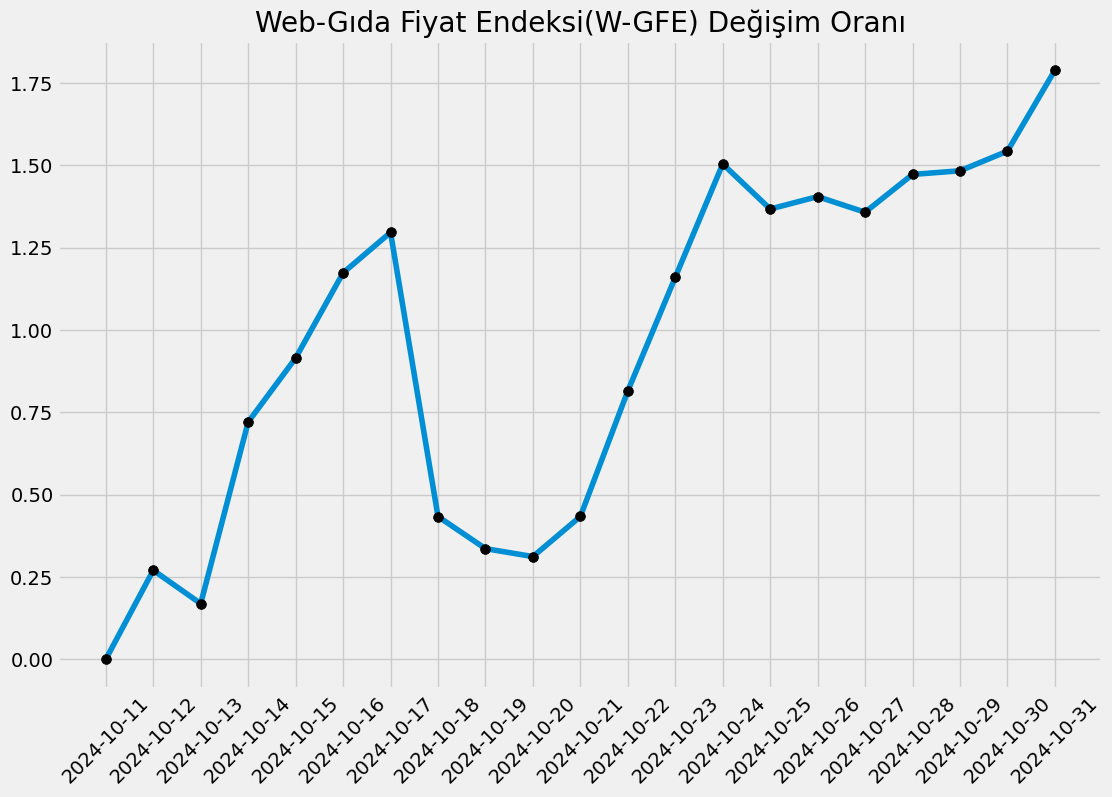

In [14]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,8))
plt.title("Web-Gıda Fiyat Endeksi(W-GFE) Değişim Oranı")
plt.plot(((gfe/100)-1)*100)
plt.scatter(x=(((gfe/100)-1)*100).index,y=(((gfe/100)-1)*100).values,color="black",zorder=3,s=50)
plt.xticks(gfe.index,rotation=45)

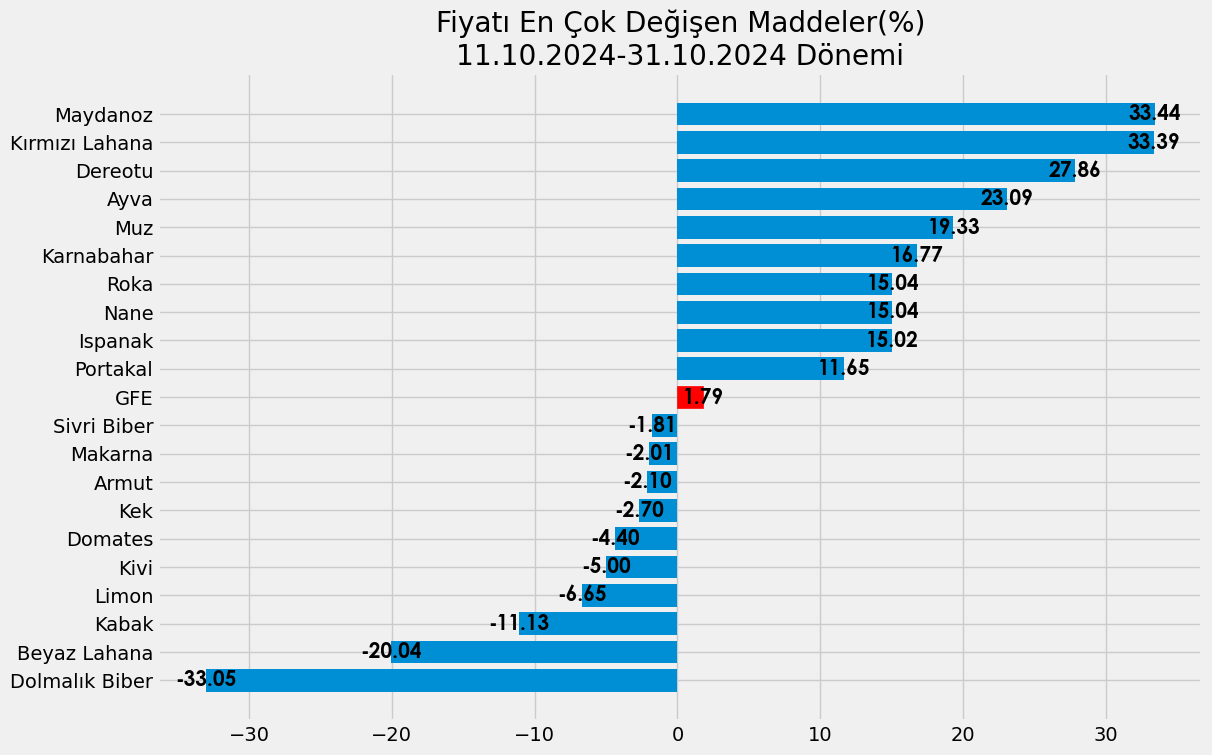

In [15]:

fark=endeksler["Değişim"]
veri=pd.concat([fark.sort_values().head(10),fark.sort_values().tail(10)],axis=0)
veri=pd.concat([veri,((gfe.iloc[-1]/gfe.iloc[0])-1)*100],axis=0)
veri=veri.sort_values()
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,8))
first=gfe.index[0].strftime("%d.%m.%Y")
last=gfe.index[-1].strftime("%d.%m.%Y")
plt.title(f"Fiyatı En Çok Değişen Maddeler(%)\n{first}-{last} Dönemi")
bars=plt.barh(y=veri.index,width=veri.values)
for bar, label in zip(bars, veri.index):
    if label == "GFE":
        bar.set_color('red')
for bar in bars:
    plt.text(
        bar.get_width(),        # X coordinate (width of the bar)
        bar.get_y() + bar.get_height() / 2,  # Y coordinate (center of the bar)
        f'{bar.get_width():.2f}',  # Text label (bar width with 2 decimal points)
        va='center',            # Vertical alignment to center
        ha='center',              # Horizontal alignment to the left of the bar end
        fontsize=15,
        fontdict={'family': 'Century Gothic', 'weight': 'bold'}            # Font size for the labels
    )

plt.show()

In [19]:
128*0.32

40.96

In [25]:
endeksler["Değişim"].sort_values()[31:88]

Ürün
Roka                           0.000000
Kırmızı Lahana                 0.000000
Dereotu                        0.000000
Kabak Çekirdeği                0.000000
Taze Fasulye                   0.000000
Antep Fıstığı                  0.000000
Pırasa                         0.000000
Havuç                          0.000000
Lokum                          0.000000
Kabartma Maddeleri             0.000000
Nane                           0.000000
Ispanak                        0.000000
Karpuz                         0.000000
Kıvırcık                       0.000000
Çilek                          0.000000
Sarımsak                       0.000000
Kırmızı Turp                   0.000000
Tahin                          0.000000
Maydanoz                       0.000000
Hazır Çorbalar                 0.001974
Şeftali                        0.017876
Leblebi                        0.043459
Krem Peynir                    0.095209
Baharat                        0.121212
Kuzu Eti                       0.13

In [34]:
satrim=ağırlıklar[ağırlıklar["Ürün"].isin(endeksler["Değişim"].sort_values()[31:88].index)]
satrim["Ağırlık"]=satrim["Ağırlık"]/satrim["Ağırlık"].sum()
import numpy as np
np.sum(satrim["Ağırlık"]*satrim["Değişim"])

C:\Users\Bora\AppData\Local\Temp\ipykernel_10516\3768565005.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  satrim["Ağırlık"]=satrim["Ağırlık"]/satrim["Ağırlık"].sum()


0.5021077624445973

In [36]:
satrim["Ağırlık"].sum()

1.0

In [28]:
ağırlıklar=pd.read_csv("ağırlıklar.csv")
ağırlıklar["Değişim"]=((ağırlıklar["Endeks_2024-10-26"]/ağırlıklar["Endeks_2024-10-11"])-1)*100
ağırlıklar

,Ürün,Ağırlık,Değişim,Endeks_2024-10-11,Endeks_2024-10-12,Ağırlıklı Endeks_2024-10-12,Endeks_2024-10-13,Ağırlıklı Endeks_2024-10-13,Endeks_2024-10-14,Ağırlıklı Endeks_2024-10-14,...,Endeks_2024-10-22,Ağırlıklı Endeks_2024-10-22,Endeks_2024-10-23,Ağırlıklı Endeks_2024-10-23,Endeks_2024-10-24,Ağırlıklı Endeks_2024-10-24,Endeks_2024-10-25,Ağırlıklı Endeks_2024-10-25,Endeks_2024-10-26,Ağırlıklı Endeks_2024-10-26
0,Pirinç,0.010129,3.776953,100,100.000000,1.012932,100.000000,1.012932,104.134813,1.054815,...,103.357897,1.046945,103.357897,1.046945,103.776953,1.051190,103.776953,1.051190,103.776953,1.051190
1,Buğday Unu,0.020352,0.505967,100,100.000000,2.035180,100.000000,2.035180,100.000000,2.035180,...,100.505967,2.045477,100.505967,2.045477,100.505967,2.045477,100.505967,2.045477,100.505967,2.045477
2,Bebek Sütü (Toz Karışım),0.005006,0.648213,100,100.000000,0.500646,100.000000,0.500646,100.000000,0.500646,...,100.463517,0.502966,100.463517,0.502966,100.648213,0.503891,100.648213,0.503891,100.648213,0.503891
3,Bulgur,0.005952,5.698307,100,100.335517,0.597176,100.335517,0.597176,104.122568,0.619716,...,104.435169,0.621577,104.435169,0.621577,105.698307,0.629095,105.698307,0.629095,105.698307,0.629095
4,Ekmek,0.100273,2.175406,100,100.000000,10.027262,100.000000,10.027262,101.265957,10.154203,...,101.453376,10.172996,101.718663,10.199597,101.718663,10.199597,102.175406,10.245396,102.175406,10.245396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Gazoz Meyveli,0.002050,1.457025,100,100.000000,0.204993,100.000000,0.204993,100.224921,0.205454,...,101.252194,0.207560,101.252194,0.207560,101.378233,0.207818,101.457025,0.207980,101.457025,0.207980
124,Kola,0.007463,2.751033,100,99.936143,0.745788,99.936143,0.745788,99.936143,0.745788,...,102.751033,0.766795,102.751033,0.766795,102.751033,0.766795,102.751033,0.766795,102.751033,0.766795
125,Soğuk Çay,0.000941,0.685595,100,100.000000,0.094077,100.000000,0.094077,100.000000,0.094077,...,100.685595,0.094722,100.685595,0.094722,100.685595,0.094722,100.685595,0.094722,100.685595,0.094722
126,Ayran,0.001595,-0.115177,100,100.000000,0.159504,100.023576,0.159541,100.023576,0.159541,...,99.806166,0.159195,99.955112,0.159432,99.931974,0.159395,99.884823,0.159320,99.884823,0.159320
